In [1]:
from keras.layers import Conv2D, SeparableConv2D, Input
from keras.models import Model

import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)

Using TensorFlow backend.


In [2]:
input_image = Input((224, 224, 3))
feature_maps = Conv2D(filters=32, kernel_size=(3,3))(input_image)
feature_maps2 = Conv2D(filters=64, kernel_size=(3,3))(feature_maps)
model = Model(inputs=input_image, outputs=feature_maps2)

In [3]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 220, 220, 64)      18496     
Total params: 19,392
Trainable params: 19,392
Non-trainable params: 0
_________________________________________________________________


## 可以看到經過兩次 Conv2D，如果沒有設定 padding="SAME"，圖就會越來越小，同時特徵圖的 channel 數與 filters 的數量一致

In [4]:
input_image = Input((224, 224, 3))
feature_maps = SeparableConv2D(filters=32, kernel_size=(3,3))(input_image)
feature_maps2 = SeparableConv2D(filters=64, kernel_size=(3,3))(feature_maps)
model = Model(inputs=input_image, outputs=feature_maps2)

In [5]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
separable_conv2d_1 (Separabl (None, 222, 222, 32)      155       
_________________________________________________________________
separable_conv2d_2 (Separabl (None, 220, 220, 64)      2400      
Total params: 2,555
Trainable params: 2,555
Non-trainable params: 0
_________________________________________________________________


## 可以看到使用 Seperable Conv2D，即使模型設置都一模一樣，但是參數量明顯減少非常多！

## 作業

請閱讀 Keras 官方範例 [mnist_cnn.py](https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py)  

並回答下列問題。僅有 70 行程式碼，請確保每一行的程式碼你都能夠理解目的

1. 是否有對資料做標準化 (normalization)? 如果有，在哪幾行?
> Ans: yes, x_train, x_test both normalized (line at 37, 38)
> 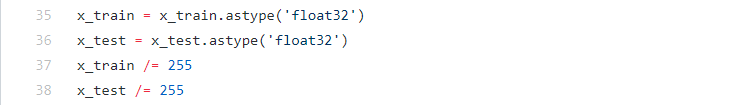
2. 使用的優化器 Optimizer 為何? (line at 60)
> Ans: optimizer=keras.optimizers.Adadelta()
> 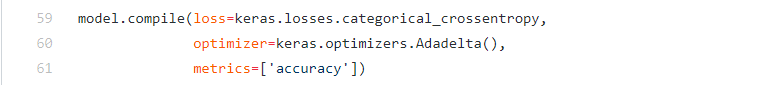
3. 模型總共疊了幾層卷積層? (line at 48, 51)
> Ans: 2 Conv2D layers
> 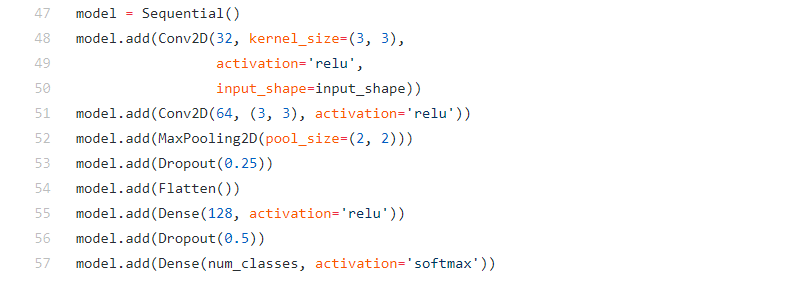
4. 模型的參數量是多少?
> Ans: Total params: 1,199,882

In [6]:
# ref: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py

'''Trains a simple convnet on the MNIST dataset.
Gets to 99.25% test accuracy after 12 epochs
(there is still a lot of margin for parameter tuning).
16 seconds per epoch on a GRID K520 GPU.
'''

#from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

print(model.summary())

'''
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
'''

print()

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dro